<a href="https://colab.research.google.com/github/GianLucas96/Lucas-Cerquera/blob/Lucas_Cerquera/Prueba_Habi1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba Técnica Analista de Datos
Instrucciones:

* Realizar el proceso de limpieza y depuración de la información en un lenguaje de programación o consulta de Base de datos que prefiera. (R, Python, SQL, etc.) 
* Para el desarrollo de los análisis de reporting y/o dashboard que realice, utilizar herramientas de preferencia: Power BI o Tableau (Public). 
* La duración de la prueba es de 48 horas a partir de la fecha de envío. 
* Las respuestas podrán ser enviadas en un PDF, un notebook, o con un link a tu repositorio de GitHub. 
* Debe presentar los scripts y documentos que realice en el análisis del ejercicio


## Manejo de base de datos. 

Dado el siguiente diseño de base de datos de una empresa de regalos


Escribir las instrucciones de SQL que permitan resolver las consultas detalladas más abajo. Observaciones:
1. Sí se pueden utilizar funciones genéricas del tipo “EDAD(fechanacimiento)”, “AÑO(fecha)”, “MES(fecha)”. <br>

Preguntas: <br>

a) Para cada casamiento con fecha posterior al 2022-01-01, el nombre de los artículos pedidos, la cantidad requerida y el indicador si fue regalado o no para los artículos con menos de 10 unidades en stock.<br>



~~~
SELECT C.ID_CASAMIENTO
,B.ID_ARTICULO
,C.FECHA
,B.CANTIDAD_REQUERIDA
,B.REGALADO
,B.NOMBRE_ARTICULO
,B.CANTIDAD_STOCK
FROM (SELECT * FROM CASAMIENTO
	  WHERE YEAR(FECHA) >= 2022) C
	  JOIN (SELECT * FROM REGALOS R JOIN
			(SELECT * FROM ARTICULOS
			 WHERE CANTIDAD_STOCK < 10) A
			ON R.ID_ARTICULO = A.ID_ARTICULO) B
            ON C.ID_CASAMIENTO = B.ID_CASAMIENTO
~~~


b) Los nombres de los artículos cuya cantidad total requerida pendiente de regalar (regalado = N) es mayor a 100 y que tiene un precio mayor a $500.
~~~
SELECT
,A.ID_ARTICULO
,A.NOMBRE_ARTICULO
,A.PRECIO
,A.CANTIDAD_STOCK
,R.CANTIDAD_REQUERIDA
,R.REGALADO
FROM (SELECT * FROM REGALOS
	  WHERE CANTIDAD_REQUERIDA > 100
	  AND REGALADO = 'N') R
	  JOIN (SELECT * FROM ARTICULOS
			WHERE PRECIO > 500) A
			ON R.ID_ARTICULO = A.ID_ARTICULO
~~~
c) Para cada casamiento desde el 2021-06-01, la cantidad de envíos.
~~~
SELECT
C.ID_CASAMIENTO
,B.ID_ENVIO
,C.FECHA
,B.CANTIDAD_ENVIADA
FROM (SELECT * FROM CASAMIENTO
	  WHERE YEAR(FECHA) >= 2022
	  AND MONTH(FECHA) >= 6 ) C
	  JOIN (SELECT * FROM DETALLE_ENVIOS D
			JOIN ORDENES_ENVIOS E ON D.ID_ENVIO = E.ID_ENVIO) B
	  ON C.ID_CASAMIENTO = B.ID_CASAMIENTO
~~~

d) EL nombre del artículo de menor Stock
~~~
SELECT * FROM ARTICULOS A , (SELECT MIN(CANTIDAD_STOCK) CANT FROM ARTICULOS)B
WHERE A.CANTIDAD_STOCK = B.CANT
~~~

## Lógica de Programación. 

Responder las siguientes preguntas de entendimiento de lógica de programación, no es necesario escribir código en lenguaje, salvo que se diga lo contrario. a. Sea la siguiente función, cuya entrada es una lista de números enteros:

a. Sea la siguiente función, cuya entrada es una lista de números enteros:

Describir en lenguaje cotidiano cuál es el resultado de aplicar está función sobre una lista ( es decir, explicar para qué entradas devuelve True y para qué entradas devuelve False. 

* Respuesta : La clave de esta función está en el return ya que este para que retorne True,
_*i*_ debe haber iterado hasta alcanzar la longitud total de la lista y que *a* sea la
mitad de i osea la mitad de la misma lista, teniendo en cuenta las condiciones de
los while y la secuencia de los mismos para que i itere la totalidad la lista, la lista 
debe ser de una longitud par con dos valores 0 (primer while) y 1 (segundo while) 
en ese orden, ejemplo list_=[0,1] o list_ = [0,0,1,1]. En cualquier otro caso la 
funciónque no cumple este patrón retorna false.



b. Construya una función recursiva que reciba como parámetros dos enteros positivos p y q, donde p representa el numerador y q el denominador de la fracción p/q (q != 0). La función debe retornar la fracción en su mínima expresión. 


Ejemplo p = 85 y q = 45, la respuesta a imprimir es 17/9 

Tip: Considere que existe una función verificar_primo(x) que retorna True si el número x es primo, o False en caso contrario.





## Manejo de Análisis de Datos.

FIFA 2019 Los jugadores de fútbol tienen muchas habilidades diferentes. Para cada posición, se necesitan habilidades diferentes en comparación con otras posiciones. Para ello se desea analizar los conjuntos de habilidades clave más necesarios para la posición de cada jugador. Para este caso, se trabajará con el conjunto de datos completo de jugadores de FIFA 19 de Kaggle. (Dataset Adjunto) Para ello se desea realizar el siguiente análisis:


a. Data Cleaning; Realizar un proceso de limpieza del dataset, el cual permita hacer análisis exploratorios y estadísticos. 


b. Exploratory Analysis: Realizar un análisis univariado y bivariado que permite identificar: 

i. Jugadores con características atípicas dentro de la muestra con respecto a salarios o edad, etc. <br>
ii. Identificar el top 5 de jugadores de mejores salarios, valoración general y potencial. <br>
iii. Realizar un comparativo entre clubes de la distribución de salarios y edad de los jugadores <br>
iv. Ver en general si existe una correlación entre la reputación internacional, el valor del mercado actual y la cláusula de liberación (value, international reputation, release clause). <br>
v. Realizar un exploratorio de las características de un jugador con base en su posición. (https://fifauteam.com/fifa-21-positions/) nota: Puede ser útil recategorizar las posiciones para facilitar el análisis. <br>


c. Modelling: Construir una segmentación de jugadores con base en sus características para entender su posición. Realice un comparativo entre los hallazgos encontrados y el exploratorio realizado en el literal anterior.

In [ ]:
#importamos las librerias necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import io 

##### se carga el dataset
#path = 'C:/Users/Kaslu/Downloads/PRUEBA_DATA_ANALYST/data_FIFA.csv'
# data_fifa = pd.read_csv(path, sep=',')
from google.colab import files 
  
# SELECCIONE FILE  
uploaded = files.upload()


Saving data_FIFA.csv to data_FIFA (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 86 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Nationality               18207 non-null  object 
 5   Overall                   18207 non-null  int64  
 6   Potential                 18207 non-null  int64  
 7   Club                      17966 non-null  object 
 8   Value                     18207 non-null  object 
 9   Wage                      18207 non-null  object 
 10  Special                   18207 non-null  int64  
 11  Preferred Foot            18159 non-null  object 
 12  International Reputation  18159 non-null  float64
 13  Weak Foot          

## a. Data Cleaning

Seleccionamos las columnas que nos interesan para resolver las preguntas de la prueba, eliminamos también los datos nulos de las columnas seleccionadas.

In [ ]:

data_fifa = pd.read_csv(io.BytesIO(uploaded['data_FIFA.csv'])) 

print(data_fifa.info())
data_fifa = data_fifa.drop(['Unnamed: 0','ID','Joined','Skill Moves','Work Rate','Real Face','Loaned From',
                            'Loaned From','Contract Valid Until','Height','Weight','Body Type','Preferred Foot',
                           'LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM',
                            'RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB',
                           'GKDiving','GKKicking','GKHandling','GKPositioning','GKReflexes'],axis=1)

data_fifa.dropna(axis=0,inplace=True)
data_fifa.head(10)
print(data_fifa.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 86 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Nationality               18207 non-null  object 
 5   Overall                   18207 non-null  int64  
 6   Potential                 18207 non-null  int64  
 7   Club                      17966 non-null  object 
 8   Value                     18207 non-null  object 
 9   Wage                      18207 non-null  object 
 10  Special                   18207 non-null  int64  
 11  Preferred Foot            18159 non-null  object 
 12  International Reputation  18159 non-null  float64
 13  Weak Foot                 18159 non-null  float64
 14  Skill 

Formateamos los string que denota el dinero y que tiene caracteres:

In [ ]:
def Str_Con__Unidades(valor):
    
    """
    Esta funcion permite converitr los str de dinero
    en su valor numerico a partir de su Letra 
    """
    if valor[-1] == 'M':
        return float(valor[1:-1])*1000000
    elif valor[-1] == 'K':
        return float(valor[1:-1])*1000
    else:
        return float(valor[1:])
             
             
data_fifa['Value'] = data_fifa['Value'].apply(lambda x: Str_Con__Unidades(x) / 1000000)
data_fifa['Wage'] = data_fifa['Wage'].apply(lambda x: Str_Con__Unidades(x) / 1000)
data_fifa['Release Clause'] = data_fifa['Release Clause'].apply(lambda x: Str_Con__Unidades(x) / 1000000)




Se recategorizan las posiciones de los jugadores y graficamos los datos numéricos en una matriz de dispersión:

In [ ]:


data_fifa.loc[data_fifa['Position'].str.contains('M', na=False),'Position'] = 'M'
data_fifa.loc[data_fifa['Position'].str.contains('F', na=False),'Position'] = 'F'
data_fifa.loc[data_fifa['Position'].str.contains('W', na=False),'Position'] = 'W'
data_fifa.loc[data_fifa['Position'].str.contains('B', na=False),'Position'] = 'B'
data_fifa.loc[data_fifa['Position'].str.contains('S', na=False),'Position'] = 'S'



#skill_p = []


#for i in skill_p:
 #   data_fifa[i] = data_fifa[i].map(lambda x: float(x[:2]))



data_fifa['International Reputation'] = data_fifa['International Reputation'].astype(int)
data_fifa.describe()




,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Jersey Number,Crossing,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause
count,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,...,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000
mean,25.226221,66.162771,71.140900,2.442667,9.618038,1595.383404,1.114823,2.942919,19.657213,49.596167,...,55.924353,46.792285,49.709788,53.299525,48.331911,58.558673,47.328967,47.776302,45.751607,4.585061
std,4.716588,7.008236,6.151409,5.720629,22.263519,275.723076,0.398559,0.659933,16.054811,18.453544,...,17.422401,20.742177,19.611146,14.171630,15.767045,11.539260,19.937220,21.681809,21.295201,11.118718
min,16.000000,46.000000,48.000000,0.010000,1.000000,731.000000,1.000000,1.000000,1.000000,5.000000,...,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,0.013000
25%,21.000000,62.000000,67.000000,0.300000,1.000000,1452.000000,1.000000,3.000000,8.000000,38.000000,...,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000,0.525000
50%,25.000000,66.000000,71.000000,0.675000,3.000000,1633.000000,1.000000,3.000000,17.000000,54.000000,...,59.000000,52.000000,55.000000,55.000000,49.000000,59.000000,53.000000,55.000000,52.000000,1.100000
75%,29.000000,71.000000,75.000000,2.000000,8.000000,1787.000000,1.000000,3.000000,26.000000,64.000000,...,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,3.500000
max,45.000000,94.000000,95.000000,118.500000,565.000000,2346.000000,5.000000,5.000000,99.000000,93.000000,...,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,228.100000



## b. Exploratory Analysis
### Respuestas:

#### 1.
* Mediante la matriz de dispersión podemos observar outliers a partir de variables como International Reputation, Wage, Value y Release Clause, identificando a simple vista los valores que pueden producir ruido en el dataset.

* Estos Outliers tiene una distribución normal alrededor de los 20 y 30 años, es donde se percibe un aumento del valor en los jugadores.
*  Tiene una correlación no lineal en Overall respecto a los valores relaciónalos con el valor en dinero del jugador, se observa que Overall > 80, el jugador se valoriza.



In [ ]:

cols = ['Age','Overall','Potential','Value','Wage','Release Clause','International Reputation']

fig = px.scatter_matrix(data_fifa,
    dimensions=cols,
    hover_name="Name",title='Exploratory Analysis',
    color ='Position')

fig.update_layout(
    title='Exploratory Analysis',
    width=1000,
    height=1000,
)


fig.show()


print('Top 5 jugadores más viejos')
print(data_fifa[['Name','Age']].sort_values('Age',ascending=False).head(5))


Top 5 jugadores más viejos
              Name  Age
4741      O. Pérez   45
10545  S. Narazaki   42
7225      C. Muñoz   41
15426     M. Tyler   41
41       G. Buffon   40



#### 2.
* Mediante una grafica de barras apiladas  podemos obtener el top 5 de los jugadores con mejor Wage, Overall y Potential:



In [ ]:
cols = ['Wage','Overall','Potential']
top_5= data_fifa.sort_values(cols,ascending=False)
top_5 = top_5[['Name','Wage','Overall','Potential']].iloc[0:5]
top_5 = top_5.sort_values(cols,ascending=True)

import plotly.graph_objects as go


fig = go.Figure(data=[
    go.Bar(name='Wage [M Euros]', y=top_5['Name'], x=top_5['Wage'],orientation='h'),
    go.Bar(name='Overall', y=top_5['Name'], x=top_5['Overall'],orientation='h'),
    go.Bar(name='Potential', y=top_5['Name'], x=top_5['Potential'],orientation='h')
])
# Change the bar mode
fig.update_layout(barmode='stack',
                 title = 'Top 5 de Jugadores con más Wage, Potetial y Overall',
                 yaxis=dict(
                     title='Players',
                     titlefont_size=16,
                     tickfont_size=14,
                     ),
                 xaxis=dict(
                     title='Wage + Overall + Potetial',
                     titlefont_size=16,
                     tickfont_size=14,
                     ))
fig.show()

#### 3. 

Creamos una función que nos permita crear el top n de los clubes con mayor nómina y analizarlos alrededor del salario de los jugadores [Wage] y su edad [Age].

* En el siguiente diagrama de caja podemos observar una alta variación en los salarios de los equipos de F.C Barcelona y R. Madrid, támbien los son los equipos que más pagan a sus jugadores, Juventus no presenta una alta variación en comparación a los otros equipos.

In [ ]:


def Crea_Top(data,col,ord_asend,i):
    
    """
    Esta función permite crear top N de los 
    clubs más gastan en nomina
    """
    
    top_5 = data[['Club','Wage','Age','Name']]
    top_5_n = top_5.groupby(['Club'],)['Wage'].sum()
    top_5_n = top_5_n.sort_values(ascending=ord_asend).iloc[0:i]
    a = top_5_n.index.values
    top_5 = top_5[top_5['Club'].apply(lambda x: x in a) == True]
    top_5 = top_5.sort_values([col],ascending=ord_asend)
    return top_5

data2 = Crea_Top(data_fifa,'Wage',False,5).groupby(['Club'], as_index = False)['Wage'].sum()
top_5 = data2.sort_values(['Wage'],ascending=False).iloc[0:10]
print('Top')
print(top_5)

fig = px.box(Crea_Top(data_fifa,'Wage',False,5),
             x="Club",
             y="Wage",
             color="Club",
             hover_name="Name",
             title = "Top 5 Clubs with the highest payroll ")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()


Top
                Club    Wage
4        Real Madrid  5017.0
0       FC Barcelona  4837.0
2    Manchester City  3741.0
3  Manchester United  3391.0
1           Juventus  3292.0


* En la siguiente gráfica podemos observa una correlación entre los Salarios y la Edad del jugador en estos equipos, ya que la edad presenta una variación similar al Salario, explicando por qué Juventus no varía en salario ya que sus jugadores se encuentran en una edad similar en comparación a los otros equipos.

In [ ]:
fig = px.box(Crea_Top(data_fifa,'Wage', False,5),
             x="Club",
             y="Age",
             color="Club",
             hover_name="Name",
             title = "Top 5 Club's Age ")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()



* En la siguiente gráfica se observa mejor la distribución y la correlación que tiene Salario Respecto a la Edad.

In [ ]:


fig = px.scatter(Crea_Top(data_fifa, 'Wage',False,5),
                 x="Age",
                 y="Wage",
                 facet_col="Club",
                 color="Club",
                 hover_name="Name",
             title = "Top 5 Club's Wage ",
                trendline="ols")
fig.show()



## 4.

Para realizar un análisis de correlación entre (value, international reputation, release clause) podemos basarnos en la gráfica de matriz de disporsión donde se puede observar estás correlaciones:

* 1. Value y Release Clause tiene una correlación lineal casi perfecta.
* 2. International Reputation también tiene una correlación con Value y Release Clause, se observa que a mayor reputación mayor variación del valor de jugador.

Estás conclusiones tambien se pueden onservar en las sigueintes gráficas:

In [ ]:
top_5_n = data_fifa.groupby(['International Reputation'],as_index=False)['Wage'].count()
top_5 = top_5_n.sort_values(['Wage'],ascending=False).iloc[0:6]



fig = px.bar(top_5, x="International Reputation", y="Wage", color="Wage", text_auto=True,
            labels = {'Wage':'# Players'})
fig.show()

corr_g = data_fifa[['International Reputation','Value','Release Clause']]

fig = px.box(data_fifa,
             x="International Reputation",
             y="Value",
             color="International Reputation",
             hover_name="Name")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()





Otra forma de analizar la correlación de las variables más directamente midiendo la correlación de Pearson mediante una matriz de correlación como la siguiente.

AxesSubplot(0.241667,0.125;0.503333x0.755)


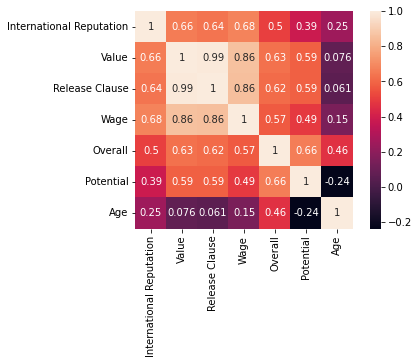

In [ ]:
cols = ['International Reputation','Value','Release Clause','Wage','Overall','Potential','Age']

cm = np.corrcoef(data_fifa[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 yticklabels=cols,
                 xticklabels=cols)
print(hm)

## 5. Análisis por posición del Jugador


Para ellos contamos con la hablidades generales de cada judador, sin contar las habilidades especificas de posición como [ 'LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']


1. Realizamos un conteo juntos al promedio de Salario dependiendo la posición:

In [ ]:
#data1 = data_fifa[['Name','Age','Nationality','Overall','Potential','Club','Value','Wage','Position','Release Clause','International Reputation']]
data_fifa.dropna(axis=0,inplace=True)

# quitamos el ruido
data2 = data_fifa.loc[np.abs(data_fifa['Wage']-data_fifa['Wage'].mean()) <= (15*data_fifa['Wage'].std())]

print('Cantidad de Jugadores por Posición')
print(data_fifa['Position'].value_counts())


top_5_n = data2.groupby(['Position'],as_index=False)['Wage'].mean()
top_5 = top_5_n.sort_values(['Wage'],ascending=False).iloc[0:6]
a = top_5.values
top_5 = top_5_n[top_5_n['Position'].apply(lambda x: x in a) == True]
top_5_wage = top_5.sort_values(['Wage'],ascending=False)


top_5_n = data2.groupby(['Position'],as_index=False)['Age'].count()
top_5 = top_5_n.sort_values(['Age'],ascending=False).iloc[0:6]
a = top_5.values
top_5 = top_5_n[top_5_n['Position'].apply(lambda x: x in a) == True]
top_5_a = top_5.sort_values(['Age'],ascending=False)


df = pd.merge(top_5_wage,top_5_a, on = 'Position')

fig = px.bar(df, x="Position", y="Age", color="Wage", text_auto=True,
            labels={
                     "Age": "# Players",
                     "Wage": "Avg_wage [M Euros]"
                 })

fig.show()


Cantidad de Jugadores por Posición
M     6261
B     5278
S     2287
GK    1900
W      823
F       94
Name: Position, dtype: int64


Vamos a realizar un análisis para observar las habilidades de los jugadores respecto a su posición de juego, las habilidades son las siguientes:

* Acceleration
* BallControl
* Dribbling

### Acceleration

In [ ]:


fig = px.box(data_fifa,
             x="Position",
             y="Acceleration",
             color="Position",
             hover_name="Name")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()


### BallControl

In [ ]:
fig = px.box(data_fifa,
             x="Position",
             y="BallControl",
             color="Position",
             hover_name="Name")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

### Dribbling

In [ ]:


fig = px.box(data_fifa,
             x="Position",
             y="Dribbling",
             color="Position",
             hover_name="Name")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

###  Conclusión:

Podemos observar que en todas las habilidades observadas el arquero ser diferencia por su bajo rendimiento, esto debido a que nos son requeridas en sus funciones con tanta importancia. 

In [ ]:
data_fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'International Reputation', 'Weak Foot', 'Position',
       'Jersey Number', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'Release Clause'],
      dtype='object')

# Modelling:

Median un modelos K-Means vamos a intentar segmentar las posiciones de los jugadores apartir de sus hablidades:

In [ ]:
from sklearn.cluster import KMeans

#data_fifa = data_fifa.loc[np.abs(data_fifa['Wage']-data_fifa['Wage'].mean()) <= (15*data_fifa['Wage'].std())]
data_clus = data_fifa.drop(['Club','Name','Position','Nationality'],axis=1)

el1 =[]
for i in range (1,15):
  kmeans = KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(data_fifa.loc[:,['Overall']])
  el1.append(kmeans.inertia_)

fig = px.line(el1, x = range(1,15),y = el1
             ,labels={
                     "y": "Distortion",
                     "x": "Number of Clusters"
                 })
             

fig.show()

In [ ]:
from matplotlib import pyplot as plt 

kmeans = KMeans(n_clusters=3, init='k-means++').fit(data_clus)
clust = pd.DataFrame(kmeans.cluster_centers_, columns = list(data_clus))
#### creamos una muestra y retiramos a quellos jugadores donde su desviación std sea 

#                       'Skill Moves','HeadingAccuracy',
 #                      'ShortPassing','Dribbling','Curve',
  #                     'FKAccuracy','LongPassing','BallControl','Acceleration',
   #                    'SprintSpeed','Agility','Reactions','Balance',
    #                   'ShotPower','Jumping','Stamina','Strength',
     #                  'LongShots','Aggression','Interceptions','Aggression'


fig = px.scatter_3d(data_fifa, x='Position', y='Dribbling',z= "SprintSpeed",color=kmeans.labels_,
            labels={
                     "Age": "Age",
                     "Potential": "Potential"
                 })

fig.show()

# Conclusión:

Como podemos ver el modelo segmento correctamente a los arqueros, pero no tambíen a los de más posiciones, esto debido a que en las demás posiciones los jugadores son similares en habilidades como se oberveo en los diagramas de caja.